<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 4*

# 📝 Assignment
---

# Logistic Regression

이번에는 [**Cardiovascular Disease dataset**](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) 데이터셋을 사용해 봅시다. 데이터에 대한 설명을 캐글 페이지에서 잘 살펴보시고 과제를 진행해 주세요!

### 1) 데이터를 전처리 하겠습니다.
- 데이터를 불러오세요.(read_csv 사용)
- id 칼럼은 drop하세요.
- missing value를 확인하세요.
- 중복된 샘플이 있는지 확인하세요.
- **중복된 샘플을 제거하고 남은 샘플의 수를 과제 제출폼에 제출하세요.**

In [1]:
import pandas as pd
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/cardio/cardio_train.csv', sep=';')#데이터를 불러오세요.(read_csv 사용)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [2]:
df=df.drop('id', axis=1)
print(df.shape)
df.isnull().sum()

(70000, 12)


age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [3]:
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))#중복된 샘플이 있는지 확인하세요.

There is 24 duplicated values in data frame


In [4]:
duplicated = df[df.duplicated(keep=False)]
duplicated = duplicated.sort_values(by=['age', "gender", "height"], ascending= False) 
# I sorted the values to see duplication clearly

duplicated.head(2) # Show us just 1 duplication of 24

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
2677,22077,1,175,69.0,120,80,1,1,0,0,1,1
45748,22077,1,175,69.0,120,80,1,1,0,0,1,1


In [5]:
df.drop_duplicates(inplace=True)
print("There is {} duplicated values in data frame".format(df.duplicated().sum()))

There is 0 duplicated values in data frame


In [6]:
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


In [7]:
print("결측치를 제거하고 남은 샘플의 수는 {}".format(df.shape))

결측치를 제거하고 남은 샘플의 수는 (69976, 12)


In [8]:
### 이곳에서 과제를 진행해 주세요 ###

### 2) 다운로드 한 훈련 데이터를 훈련/검증/테스트 세트로 나누어 주세요.
- 타겟 특성을 확인하고 타겟 변수를 나누어 줍니다.
- 훈련과 테스트 데이터로 나누어 줍니다(train_test_split 사용, train/test = 80/20, random_state=2)
- 훈련데이터를 훈련과 검증데이터로 나누어 줍니다(train_test_split 사용, train/validation = 80/20, random_state=2)
- **검증 데이터(X_val)의 갯수를 과제 제출폼에 제출하세요.**

In [9]:
#일단 트레인, 검증, 테스트 데이터를 나누기 위해서우선 데이터 전부를 가져오고,  
train = df.copy(deep=True)
train.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [10]:
#
from sklearn.model_selection import train_test_split
train1, test = train_test_split(train, test_size=0.2, random_state=2)
print("train shape: ", train1.shape)
print("test shape: ", test.shape)

train shape:  (55980, 12)
test shape:  (13996, 12)


In [11]:
 # 타겟데이터로 쓸 cardio는 테스트데이터에서 제외한다.
test = test.drop('cardio', axis=1)
print(test.shape)
test.head()

(13996, 11)


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
5883,15305,1,168,71.0,110,70,1,1,0,0,1
33971,22883,1,157,95.0,140,90,1,1,0,0,1
46809,18941,1,166,68.5,110,70,1,2,0,0,1
32687,16076,2,173,72.0,120,80,1,3,1,1,1
56954,22446,1,155,85.0,130,80,3,3,0,0,1


In [12]:
#테스트 데이터를 제외한 나머지 데이터를 트레인데이터와 검증데이터로 나눈다.
from sklearn.model_selection import train_test_split
train2, val = train_test_split(train1, test_size=0.2, random_state=2)
print("train shape: ", train.shape)
print("val shape: ", val.shape)
print("검증데이터 갯수 11196개")
#정리: train2= 트레인데이터 val= 검증데이터  test=테스트데이터

train shape:  (69976, 12)
val shape:  (11196, 12)
검증데이터 갯수 11196개


### 3) 사이킷런의 LogisticRegression을 사용해 모델을 만들어 보세요.
- 모델을 만들기 전에 기준모델을 설정합니다.
- **LogisticRegression 모델을 학습하고(max_iter=1000) 검증세트 정확도를 과제 제출폼에 제출하세요.**


In [13]:
#분류문제를 풀기전에 항상 먼저 타겟 범주가 어떤 비율을 가지고 있는지 확인해 보아야 합니다.
# 타겟을 정합니다
# cardio => 0 = No, 1 = Yes
target='cardio'  
y_train = train2[target] #트레인데이터의 cardio를 y_train에 넣고 정규화 돌려!
y_train.value_counts(normalize=True)

1    0.501697
0    0.498303
Name: cardio, dtype: float64

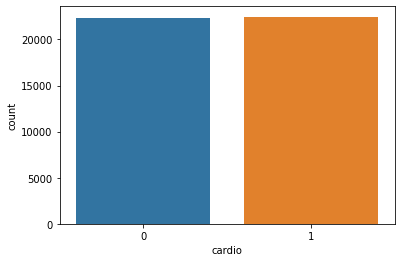

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.countplot(x=y_train);
#범주간 차이비율 안나네. .....뭔가 의심스러운데 타겟데이터 잘못뽑은거 아님???

In [15]:
#(분류문제의 기준모델) 범주 0 (majority class)으로 모든 예측을 수행해 보겠습니다.
# mode(): Return the highest frequency value in a Series. Mode메소드를 통해서 메이져리티 클래스를 얻어낸다./ 
major = y_train.mode()[0]

# 기준모델로 예측하기위해 타겟샘플수 만큼 0이 담긴 리스트를 만듭니다.
y_pred = [major] * len(y_train)

In [16]:
#이렇게 기준모델로 최다 비율 클래스를 사용할 경우 정확도를 구해 봅시다.
# 최다 클래스의 빈도가 정확도가 됩니다.
from sklearn.metrics import accuracy_score
print("training accuracy: ", accuracy_score(y_train, y_pred))#50%정도

training accuracy:  0.501697034655234


In [17]:
# 검증세트 에서도 정확도를 확인해 볼 수 있습니다.
y_val = val[target]
y_pred = [major] * len(y_val)
print("validation accuracy: ", accuracy_score(y_val, y_pred)) #50%정도



validation accuracy:  0.49821364773133264


In [18]:
## 세션노트의 이 부분에서 '숫자형 특성 만 사용하겠습니다'라고 한거는 -->이거 인코딩이 안되서 그런듯??
featuers = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
X_train = train2[featuers]
X_val = val[featuers]

In [19]:
from sklearn.impute import SimpleImputer
#근데 앞에서 결측치랑 다 제거 했는데, 굳이 impute해야됨????

## default, imputing 'mean' value
imputer = SimpleImputer() 
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)


In [20]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
print('검증세트 정확도', logistic.score(X_val_imputed, y_val))

검증세트 정확도 0.6000357270453733


In [22]:
pred = logistic.predict(X_val_imputed)
pred

array([1, 0, 1, ..., 0, 1, 0])

### 4) 데이터에서 범주형 성질을 지닌 특성을 찾아 원핫인코딩 하세요.
- category_encoders를 사용해서 'gender' 특성만 원핫인코딩 하세요.
- LogisticRegression 모델을 다시 학습합니다.
- **검증세트 정확도를 과제 제출폼에 제출하세요.**

In [23]:
!pip install --upgrade category_encoders

     |████████████████████████████████| 81kB 10.2MB/s 


In [24]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

features = ['gender'] #젠더만 인코딩하라는데....
target = 'cardio'

X_train = train2[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
X_train.head(3)

,gender
221,1
59211,2
26654,1


In [26]:
encoder = OneHotEncoder(use_cat_names=True) #use_cat_names=True 를 사용하면 인코딩할때 각 범주의 이름을 인코딩에 그대로 사용함.
X_train_encoded = encoder.fit_transform(X_train) #fit_transform 이것 flt 이랑 transform이랑을 연달아서 소환한 형태임..각각
#따로 소환할 수 도 있다. train인 경우엔 fit과 transform을 다 했고 
X_val_encoded = encoder.transform(X_val) #val에선 트레인에서 핏한 정보를 사용해서 트랜스폼만 사용했다.
#왜냐면, 우리가 원하는 것은 훈련데이터에서 수행한 인코딩방법과 똑같은 방식으로 검증데이터에서도 인코딩을 수행하기 위함임. 
#망약 검증데이터에 핏과 트랜스폼까지 수행하면 어떤 범주가 부족할 경우에는 문제가 생길 수 있다. 
X_train_encoded.head(3)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,gender
221,1
59211,2
26654,1


In [27]:
#결측치를 평균으로 변환합니다.
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)

In [28]:
X_val_imputed[:5]

array([[1.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [29]:
#특성값들을 표준화 합니다.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [30]:
X_train_scaled

array([[-0.7344333 ],
       [ 1.36159403],
       [-0.7344333 ],
       ...,
       [-0.7344333 ],
       [ 1.36159403],
       [ 1.36159403]])

In [31]:
#평균은 0, 표준편차는 1로 표준화 되었습니다.......???????????? 평균 0아닌데 ㅡㅡ.......세션노트도 0아니었음;;
X_train_scaled.T[0].mean(), X_train_scaled.T[0].std()

(-1.762712083399141e-16, 1.0)

In [32]:
model = LogisticRegression(random_state=1)
model.fit(X_train_scaled, y_train)

ValueError: ignored

In [ ]:
y_pred = model.predict(X_val_scaled)
accuracy_score(y_val, y_pred)

In [ ]:
#계수들을 확인해 봅시다.
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients
#어떤 특성이 중요한지도 한눈에 파악이 가능하다. 좌석등급이 높을수록 생존률이 높고, 남성보다는 여성이 월등히 생존율이 높다. 
#나이도 높을수록 생존율이 낮고///

In [ ]:
coefficients.sort_values().plot.barh();

###

### 5) 학습한 모델을 검증세트에서 최적화 시킨 후, 테스트세트에서 딱 한 번 정확도를 확인해 보세요.
- **테스트 세트 정확도를 과제 제출폼에 제출하세요.(0.712 이상)**

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###

## 🔥 도전과제:

### 6) EDA를 추가적으로 수행하고 가능한 방법으로 모델을 튜닝해서 결과를 만들어 보세요. 최소한 다음 내용들이 포함이 되어야 합니다.
- 새로운 특성을 최소한 한 개 이상 만드세요.
- 특성들을 확인해서 아웃라이어라고 생각되는 데이터를 가진 샘플을 제거하세요.
- [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html) 을 사용하세요. (여러가지 종류의 Scalar를 어떤 상황에 적용해야 하는지 알아보고 사용해 보세요.)
- 만들어진 모델 성능을 리포팅하고 해석합니다.
